In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train_eda.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:

# Separate features (X) and target variable (y)
X = df.drop("Survived", axis=1)
y = df["Survived"]


# Remove non-predictive columns that won't be used in the model
X = X.drop(["Name", "Ticket", "Cabin"], axis=1)



# Convert categorical 'Sex' feature to numerical using binary encoding
# male = 0, female = 1
X["Sex"] = X["Sex"].map({"male": 0, "female": 1})  #BINARY enco on X df




# Apply one-hot encoding to 'Embarked' feature
# drop_first=True removes one category to avoid multicollinearity
X = pd.get_dummies(X, columns=["Embarked"], drop_first=True)#oneHot enco

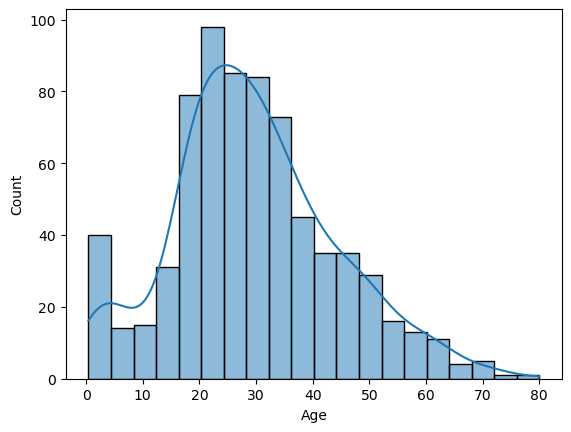

In [5]:
age_before = X["Age"]
sns.histplot(age_before,kde=True)
plt.show()

In [6]:


# Initialize KNNImputer with 4 nearest neighbors to fill missing values
imputer = KNNImputer(n_neighbors=4) #neighbors NOT neighboUrs


# Apply the imputer to fill missing values in X
# Convert the result back to a DataFrame with the original column names
X_imputed = pd.DataFrame(
    imputer.fit_transform(X), 
    columns=X.columns)

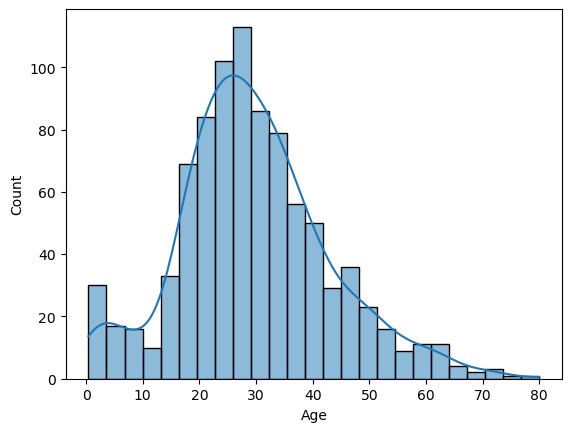

In [7]:
# Create a histogram plot of the 'Age' column from X_imputed dataframe
# kde=True adds a kernel density estimate curve to visualize the distribution

sns.histplot(X_imputed["Age"], kde=True)
plt.show()  # Display the plot

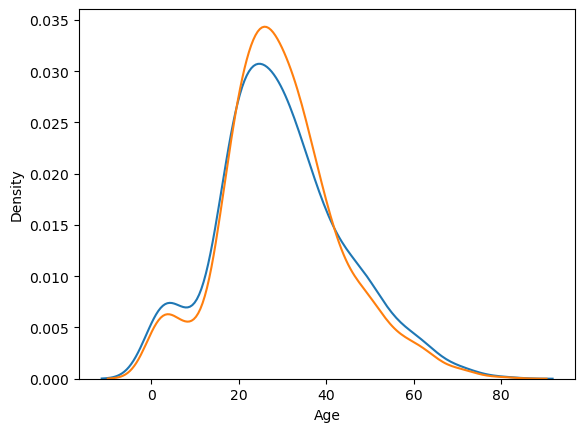

In [8]:
# Plot the kernel density estimate (KDE) of the original age distribution
sns.kdeplot(age_before)
# Plot the KDE of the imputed age distribution to compare with the original
sns.kdeplot(X_imputed["Age"])

# Display the plot showing both distributions
plt.show()